In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("D:\\SUMMER PROJECTS\\ALGOSENSE\\archive\\ALL Prices 1990-2021 mar.csv")
columns = list(df.columns)
n = df.shape[1]
m = df.shape[0]

In [ ]:
df.head()

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,...,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
0,1990-01,1990,ANG MO KIO,2,4 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,10.997442,61.59,139633.05730,1517.750623,92.9,88869.752422,965.975570,144292.502700,1568.396769,22901
1,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,8.464849,61.59,95794.77188,1168.228925,92.9,60968.783638,743.521752,98991.368143,1207.211806,22901
2,1990-01,1990,ANG MO KIO,2,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1 SINGAPORE,1.366272,103.841465,...,7.606769,61.59,76635.81750,1049.805719,92.9,48775.026911,668.151054,79193.094510,1084.836911,22901
3,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,8.287972,61.59,76635.81750,1143.818172,92.9,48775.026911,727.985476,79193.094510,1181.986486,22901
4,1990-01,1990,ANG MO KIO,2,4 ROOM,211,ANG MO KIO AVE 3,211 ANG MO KIO AVE 3 SINGAPORE,1.369226,103.841652,...,11.484353,61.59,129891.21610,1603.595261,93.3,82315.112540,1016.235957,133650.125891,1650.001555,22901


In [ ]:
df.dtypes

month                               object
year                                 int64
town                                object
town_dummy                           int64
flat_type                           object
block                               object
street_name                         object
address                             object
latitude                           float64
longitude                          float64
storey_range                        object
storey                               int64
area_sqm                           float64
flat_model                          object
lease_start                          int64
lease_rem                            int64
resale_price                       float64
price_psm                          float64
price_psm_yearly                   float64
Core CPI                           float64
price cpi_adj                      float64
price_psm cpi_adj                  float64
bala lease pct                     float64
price lease

**DATA ANALYSIS**

Analysing the data we find the features that have minimal role in Price Prediction. We Also one-hot encode the required columns appropriately to integers.

In [ ]:
ColumnsToDrop = ['month', 'town', 'street_name', 'block', 'address', 'storey_range', 'year_gni']
df_modified = df.drop(ColumnsToDrop, axis=1)
df_modified = pd.get_dummies(df_modified, columns=['flat_type', 'flat_model'])

In [ ]:
bool_columns = df_modified.select_dtypes(include=['bool']).columns
df_modified[bool_columns] = df_modified[bool_columns].astype(int)

In [ ]:
df_modified.head()

,year,town_dummy,latitude,longitude,storey,area_sqm,lease_start,lease_rem,resale_price,price_psm,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,1990,2,1.365485,103.844025,11,92.0,1976,85,86000.0,934.782609,...,0,1,0,0,0,0,0,0,0,0
1,1990,2,1.365485,103.844025,8,82.0,1976,85,59000.0,719.512195,...,0,1,0,0,0,0,0,0,0,0
2,1990,2,1.366272,103.841465,5,73.0,1976,85,47200.0,646.575343,...,0,1,0,0,0,0,0,0,0,0
3,1990,2,1.365485,103.844025,11,67.0,1976,85,47200.0,704.477612,...,0,1,0,0,0,0,0,0,0,0
4,1990,2,1.369226,103.841652,5,81.0,1977,86,80000.0,987.654321,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_modified.dtypes

year                                   int64
town_dummy                             int64
latitude                             float64
longitude                            float64
storey                                 int64
area_sqm                             float64
lease_start                            int64
lease_rem                              int64
resale_price                         float64
price_psm                            float64
price_psm_yearly                     float64
Core CPI                             float64
price cpi_adj                        float64
price_psm cpi_adj                    float64
bala lease pct                       float64
price lease_adj implied              float64
price_psm lease_adj implied          float64
price cpi_lease_adj implied          float64
price_psm cpi_lease_adj implied      float64
flat_type_1 ROOM                       int32
flat_type_2 ROOM                       int32
flat_type_3 ROOM                       int32
flat_type_

In [ ]:
Y = np.array(df_modified['resale_price']).reshape(m, 1)
X = df_modified.drop(['resale_price'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(X))

In [ ]:
m = X.shape[0]
X_train = X[0 : 2*m // 3, :]
Y_train = Y[0 : 2*m // 3]
X_test = X[2*m // 3 : m, :]
Y_test = Y[2*m // 3 : m]

In [ ]:
X_train.shape

(560612, 47)

In [ ]:
def dW(X, Y, W, b, model, Lambda):
    m = X.shape[0]
    if model == 'Ridge':
        errors = np.dot(X, W) + b - Y
        derivative_w = np.dot(X.T, errors) / m + 2*Lambda*W
        return derivative_w
    elif model == 'Lasso':
        errors = np.dot(X, W) + b - Y
        derivative_w = np.dot(X.T, errors) / m + np.sign(W)
        return derivative_w
    else:
        errors = np.dot(X, W) + b - Y
        derivative_w = np.dot(X.T, errors) / m
        return derivative_w


def db(X, Y, W, b):
    m = X.shape[0]
    errors = np.dot(X, W) + b - Y
    derivative_b = np.sum(errors) / m
    return derivative_b


def GradientDescent(X, Y, W, b, learningRate, epochs, model, Lambda):
    for i in range(epochs):
        W_temp, b_temp = W, b
        W = W - learningRate * dW(X, Y, W_temp, b_temp, model, Lambda)
        b = b - learningRate * db(X, Y, W_temp, b_temp)
    return W, b


In [ ]:
m = X_train.shape[0]
n = X_train.shape[1]
W = np.random.randn(n).reshape(n, 1)
b = 0
W, b = GradientDescent(X_train, Y_train, W, b, 0.1, 1000, 'Simple L2 Loss', 0)

In [ ]:
Y_predicted = np.dot(X_test, W)+b

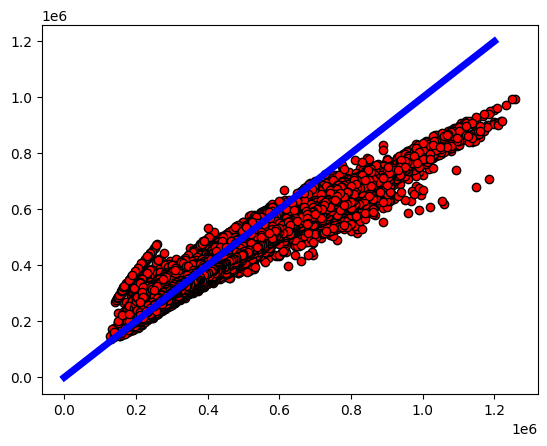

In [ ]:
plt.scatter(Y_test, Y_predicted, color = 'red', edgecolors='black')
Ideal_lineX = np.linspace(0, 1200000, 1200000)
plt.plot(Ideal_lineX, Ideal_lineX, color='blue', linewidth = 5)

In [ ]:
RSS = np.sum((Y_test-Y_predicted)**2)
mean_Y = np.mean(Y_predicted)
TSS = np.sum((Y_test-mean_Y)**2)
R = 1-RSS/TSS
R

0.8646699157799346

**RIDGE REGRESSION**

In [ ]:
m = X_train.shape[0]
n = X_train.shape[1]
W_Ridge = np.random.randn(n).reshape(n, 1)
b_Ridge = 0
W_Ridge, b_Ridge = GradientDescent(X_train, Y_train, W, b, 0.1, 1000, 'Ridge', 0.001)

In [ ]:
Y_predicted_Ridge = np.dot(X_test, W_Ridge)+b_Ridge

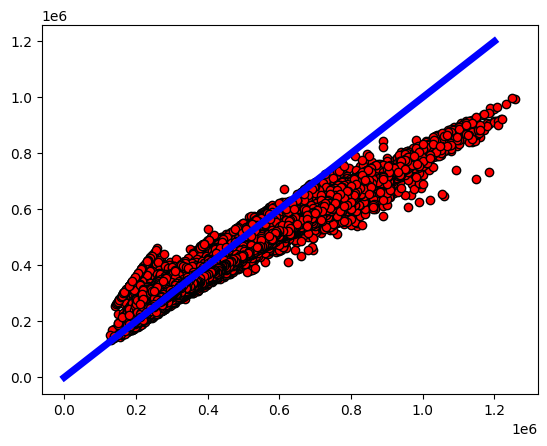

In [ ]:
plt.scatter(Y_test, Y_predicted_Ridge, color = 'red', edgecolors='black')
Ideal_lineX = np.linspace(0, 1200000, 1200000)
plt.plot(Ideal_lineX, Ideal_lineX, color='blue', linewidth = 5)

In [ ]:
RSS = np.sum((Y_test-Y_predicted_Ridge)**2)
mean_Y = np.mean(Y_predicted_Ridge)
TSS = np.sum((Y_test-mean_Y)**2)
R = 1-RSS/TSS
R

0.8562107104877734

**LASS0 REGRESSION**

In [ ]:
m = X_train.shape[0]
n = X_train.shape[1]
W_Lasso = np.random.randn(n).reshape(n, 1)
b_Lasso = 0
W_Lasso, b_Lasso = GradientDescent(X_train, Y_train, W, b, 0.1, 1000, 'Lasso', 0.2)

In [ ]:
Y_predicted_Lasso = np.dot(X_test, W_Lasso)+b_Lasso

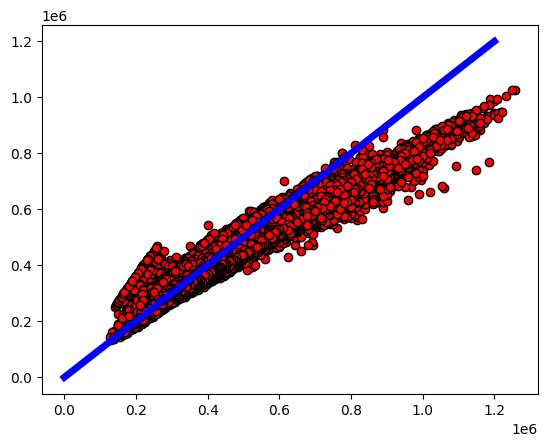

In [ ]:
plt.scatter(Y_test, Y_predicted_Lasso, color = 'red', edgecolors='black')
Ideal_lineX = np.linspace(0, 1200000, 1200000)
plt.plot(Ideal_lineX, Ideal_lineX, color='blue', linewidth = 5)

In [ ]:
RSS = np.sum((Y_test-Y_predicted_Lasso)**2)
mean_Y = np.mean(Y_predicted_Lasso)
TSS = np.sum((Y_test-mean_Y)**2)
R = 1-RSS/TSS
R

0.8735737873843707